# Vulnerability Classification with Neural Networks

Neural networks are powerful machine learning models that aim to replicate, in a simplified way, how our brain works. In short, neural networks possess a large number of neurons. These neurons react to input signals (the input data we feed) and produce outputs. Networks receive a feedback based on whether the output was correct or not and use that feedback to adjust how it reacts to the input. In this class, we will see how each of the individual components of a neural network behaves and then use these components to form a full-fledged neural network.


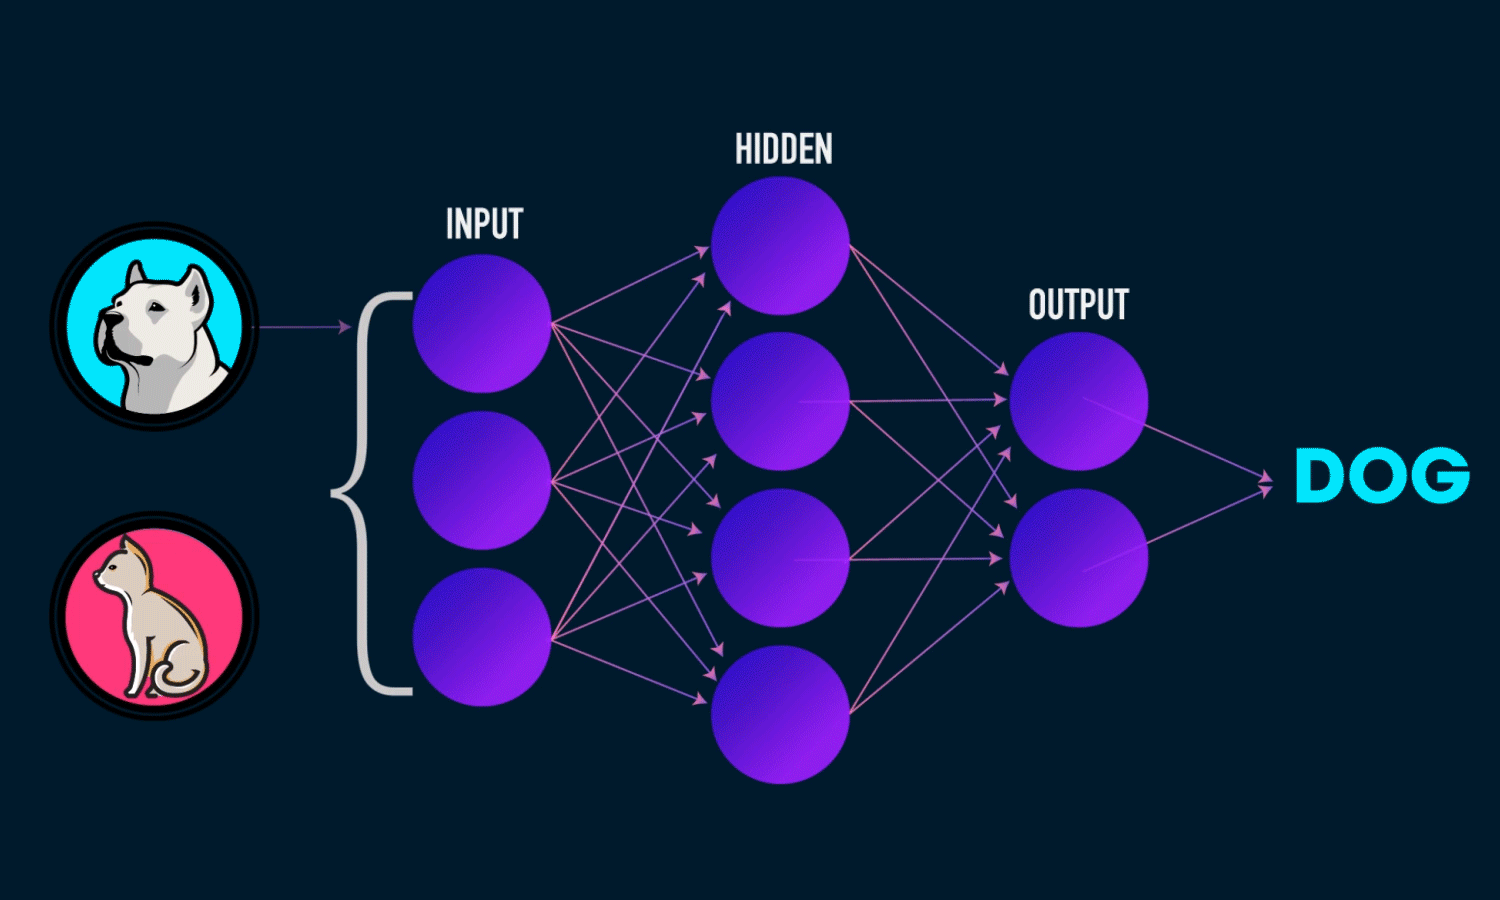

## Agenda
 - The Structure of a Neural Network
   - Neurons
   - Activation Function
   - A simple classifier
 - Training a Neural Network
   - Loss Function
   - Backpropagation
 - Training a Neural Network with Keras
 - Lab06: Classifying Security Vulnerabilities with Neural Networks


## The Structure of a Neural Network

First, let's look at what a Neural Network really is.

### Neurons

The core component of a neural network are the [Neurons](https://victorzhou.com/blog/intro-to-neural-networks/). Similar to our brain, neural networks are composed of several interconnected neurons. Each of these neurons receives multiple signals as input, aggregates these inputs, and then output a new signal. 

In practice, a neuron receives input values, multiplies each input by a weight, sums these products and then adds a bias term: 


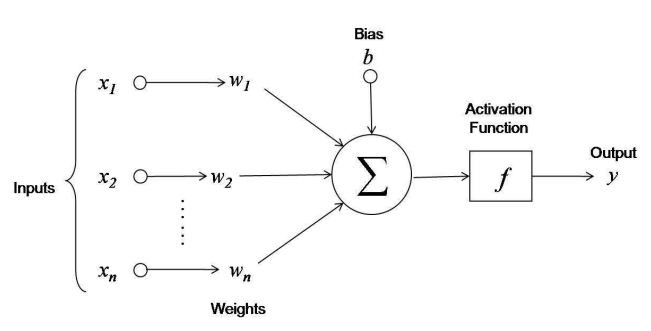

The values of the weights and the bias term are learned during the training process. This allows the neuron to learn which inputs are more important and how they affect the output. For instance, when predicting whether an animal is a cat or a dog, the neuron may learn that the ears of the animal are more important to determine if it's a cat or a dog than the tail.

A neuron can receive any number of inputs and will produce a single output. Let's take a quick look at how a neuron works in practice. Let's implement a neuron and see it working in practice:

In [ ]:
import numpy as np

def neuron(input):
   weights = np.array([0.5, 0.5])
   bias = 0
   return np.dot(input, weights) + bias


input = np.array([0.1, 0.9])
output = neuron(input) 
print(output) 

0.5


That's it! The operation of a neuron can be implemented with a single line of code. In practice, what our neuron did was:

$y = inputs \times weights + bias = 0.1\times0.5 + 0.9\times0.5 + 0 = 0.5$

A simple mathematical operation to generate the output, that's what the neuron does. 

As we will see next, however, the neurons employed in neural networks are often paired with a second component: the **activation function**.

### Activation Function

The [activation function](https://medium.com/deep-learning-demystified/introduction-to-neural-networks-part-1-e13f132c6d7e) serves a simple purpose in the neural network: it adds non-linearity to the output of a neuron. As we saw, the output of a neuron is a linear combination of its inputs, weights, and bias. In short, it means that regardless of the values of the weights and bias terms in our neuron, its output will always have a linear relationship with the inputs. However, in practice, the relationship between inputs and outputs is rarely linear.

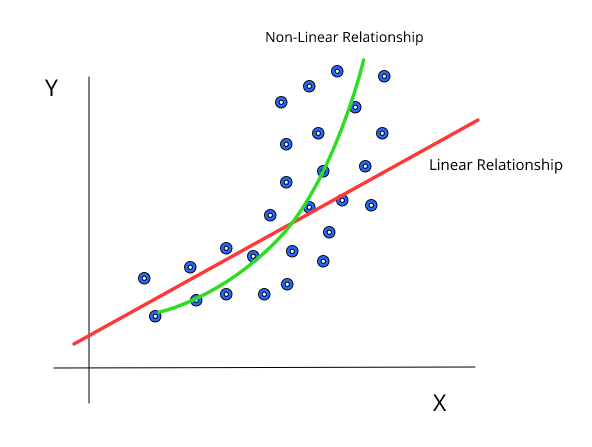

The job of the activation function is simply to add non-linearity to the neurons' output, allowing the network to model non-linear relationships between inputs and outputs. In a neural network, the output of a neuron always goes through an activation function. Recall the neuron illustration we saw:

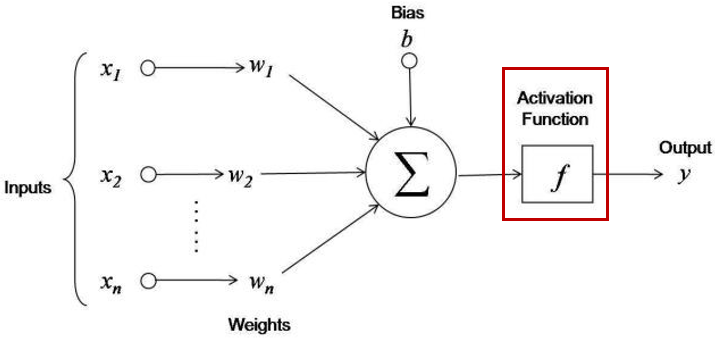

There are several [activation functions](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html) we can use. In this class, we will focus on the sigmoid activation function:

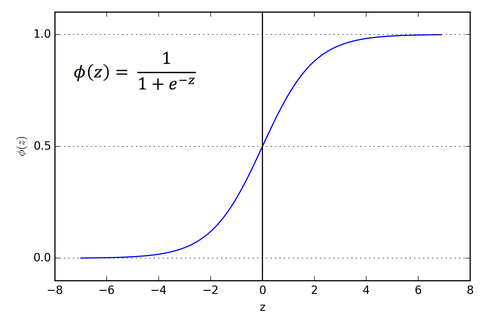

This is a function that takes the original output and transforms it so that it follows a logistic curve with values between 0 and 1. Let's update our neuron to include the activation function and then see what happens to the outputs.

For simplicity, let's consider a neuron that receives a single input.

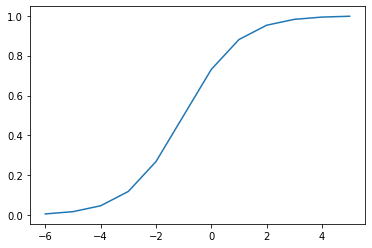

neuron(-6): [0.00669285]
neuron(-5): [0.01798621]
neuron(-4): [0.04742587]
neuron(-3): [0.11920292]
neuron(-2): [0.26894142]
neuron(-1): [0.5]
neuron(0): [0.73105858]
neuron(1): [0.88079708]
neuron(2): [0.95257413]
neuron(3): [0.98201379]
neuron(4): [0.99330715]
neuron(5): [0.99752738]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1 + np.exp(-x))

def neuron(x):
  weights = np.array([1])
  bias = 1
  output = np.dot(x, weights) + bias
  return sigmoid(output)

X = np.arange(-6, 6, 1).T
y = []
for x in X:
  y.append(neuron(x))

plt.plot(X, y)
plt.show()
for idx, x in enumerate(X):
    print(f"neuron({x}): {y[idx]}")

### A simple classifier

Now that we have our network (composed of a single neuron), we can use it to make predictions. For example, let's make some predictions on the classification of fruits as either apples or oranges.

First, we load our dataset:

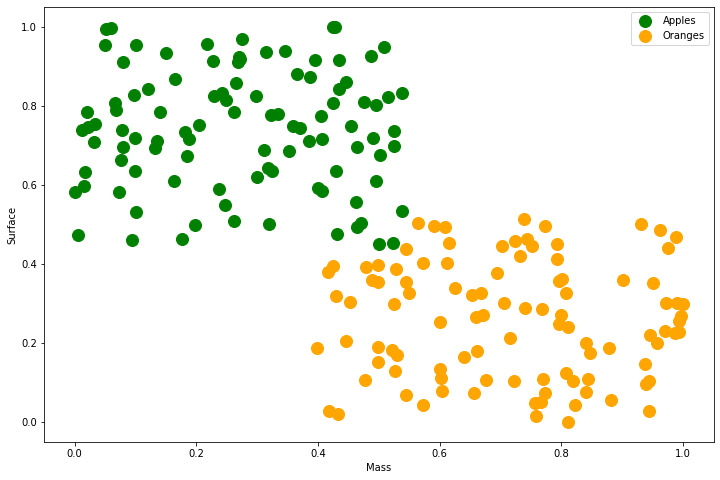

In [ ]:
!wget 'https://docs.google.com/uc?export=download&id=1lPCfRR8a-tX0n8fXAQbMazFYr_VPNB0A' -O "fruits.csv" -q
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
data = pd.read_csv('fruits.csv')

## Important! Normalize dataset to [0, 1] range
data["Mass"] = (data["Mass"] - min(data["Mass"]))/(max(data["Mass"]) - min(data["Mass"]))
data["Surface"] = (data["Surface"] - min(data["Surface"]))/(max(data["Surface"]) - min(data["Surface"]))

def plot_dataset(dataset):
  mpl.rcParams['lines.markersize'] = 12

  # Plotting data
  plt.figure(figsize=(12, 8))

  plt.scatter(dataset[dataset["Fruit"] == 0]["Mass"], dataset[dataset["Fruit"] == 0]["Surface"], c='green',  label='Apples')
  plt.scatter(dataset[dataset["Fruit"] == 1]["Mass"], dataset[dataset["Fruit"] == 1]["Surface"], c='orange',  label='Oranges')

  plt.xlabel('Mass')
  plt.ylabel('Surface')
  plt.legend()
  plt.show()
plot_dataset(data)

Then, we feed our data as input to the network and get its output as predictions. The sigmoid activation function gives us a value between 0 and 1. In our dataset, 0 means apple and 1 means orange. We can make predictions by looking at the output of the network as the probability of the fruit being an orange. We can then say that the prediction is an orange if the probability is greater than 0.5 and an apple otherwise.

In [ ]:
from sklearn.metrics import accuracy_score
def neuron(x):
  weights = np.array([1, 1])
  bias = 0
  output = np.dot(x, weights) + bias
  return sigmoid(output)

y_preds = []
for fruit_idx in range(len(data["Fruit"])):
  prediction = neuron(np.array([data["Mass"][fruit_idx], data["Surface"][fruit_idx]]))
  y_preds.append(prediction > 0.5)

y = data["Fruit"]
print(f"Accuracy: {accuracy_score(y, y_preds)*100}%")

Accuracy: 50.0%


It doesn't work... but that is not surprising. Our network did not learn anything yet, we just told it how to interpret the inputs by randomly choosing the weights. For instance, let's try some different values for the weights and see if we can find a good fit:

In [ ]:
from sklearn.metrics import accuracy_score
def neuron(x):
  weights = np.array([1, -0.5])
  bias = 0
  output = np.dot(x, weights) + bias
  return sigmoid(output)

y_preds = []
for fruit_idx in range(len(data["Fruit"])):
  prediction = neuron(np.array([data["Mass"][fruit_idx], data["Surface"][fruit_idx]]))
  y_preds.append(prediction > 0.5)

y = data["Fruit"]
print(f"Accuracy: {accuracy_score(y, y_preds)*100}%")

Accuracy: 83.5%


This is better, but let's see if we can do better:

In [ ]:
from sklearn.metrics import accuracy_score
def neuron(x):
  weights = np.array([1, -1])
  bias = 0
  output = np.dot(x, weights) + bias
  return sigmoid(output)

y_preds = []
for fruit_idx in range(len(data["Fruit"])):
  prediction = neuron(np.array([data["Mass"][fruit_idx], data["Surface"][fruit_idx]]))
  y_preds.append(prediction > 0.5)

y = data["Fruit"]
print(f"Accuracy: {accuracy_score(y, y_preds)*100}%")

Accuracy: 98.5%


We have almost 100% accuracy, amazing! However, we got this performance using trial-and-error. We don't want to set weights manually for every network we use. Instead, we want the network to automatically learn these values from data instead. In other words, we want to **train the network**.

## Training a Neural Network

We need two components in order to train our network:
1. A measure of how good or bad the prediction of the network was
2. A way to use this measure to update the weights and bias of our network

We will take a look at each of these components in turn.

### Loss Function

The first thing we need is a measure of how good or bad the network's predictions are. That is, how far the predictions are from the ground truth. This measure is what we call a [**Loss Function**](https://medium.com/data-science-group-iitr/loss-functions-and-optimization-algorithms-demystified-bb92daff331c). Our goal when we train our model is to minimize this loss function, as that means our networks predictions will be accurate.

There are many available loss functions, and the nature of our problem should dictate our choice of loss function. For now, let's use the simple sum of squared errors:



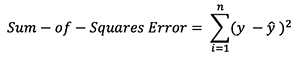

$y$ is the ground-truth and $\hat{y}$ is our network's prediction. This loss function basically computes the difference between our network's prediction and the ground-truth, i.e., the network's error. Naturally, we want to minimize the error of our network, to get predictions as close to the ground truth as possible. So, during training, we will try to minimize this loss function.

Let's take a look at the loss for the network with the two weight setups we tried previously:

In [ ]:
def loss_function(y_true, y_pred):
  return np.sum((y_true - y_pred)**2)

def neuron(x, weights, bias):
  output = np.dot(x, weights) + bias
  return sigmoid(output)

y_true = data["Fruit"]

y_pred = []
weights = np.array([1, -1])
bias = 0
for fruit_idx in range(len(data["Fruit"])):
  prediction = neuron(np.array([data["Mass"][fruit_idx], data["Surface"][fruit_idx]]), weights, bias)
  y_pred.append(prediction)
y_pred = np.array(y_pred)
print(f"Loss with good weights: {loss_function(y_true, y_pred)}")


y_pred = []
weights = np.array([1, 1])
bias = 0
for fruit_idx in range(len(data["Fruit"])):
  prediction = neuron(np.array([data["Mass"][fruit_idx], data["Surface"][fruit_idx]]), weights, bias)
  y_pred.append(prediction)
y_pred = np.array(y_pred)
print(f"Loss with bad weights: {loss_function(y_true, y_pred)}")


Loss with good weights: 30.69006016536425
Loss with bad weights: 61.548327813144745


As expected, the loss is higher for the set of weights the performed worse. So, if we find a setting that minimizes this loss, we will naturally get the best performance.

In neural networks, we minimize the loss by doing [**backpropagation**](https://medium.com/deep-learning-demystified/introduction-to-neural-networks-part-2-c261a99f4138).

### Backpropagation

The idea behind backpropagation is simple. Earlier, we used the network to make predictions and we compare these predictions to the ground truth using the loss function. Now, during backpropagation, we send — or propagate — this information back to the network so that it can adjust the weights accordingly.

The most common approach to backpropagation is **gradient descent**.  


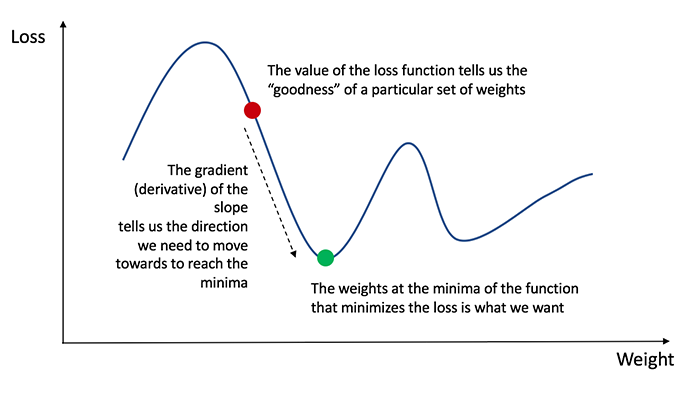

The idea is to use the derivative of the loss function with respect to the weights and bias in order to update them. Recall from calculus that the derivative of a function gives us the slope of the function. If we follow the gradient, we basically take steps towards the minimum of the loss function, which is what we want. 

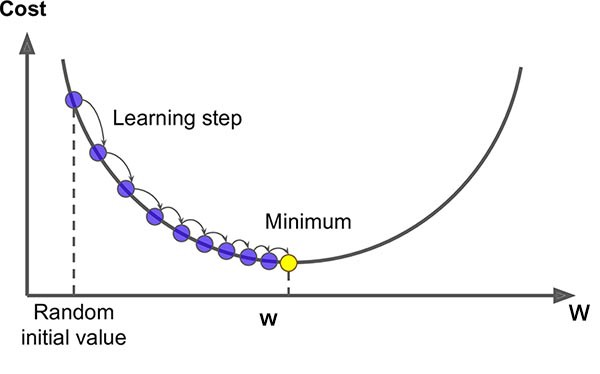

The speed at which we move towards the minimum (following the gradient) is controlled by a learning-rate hyperparameter. Choosing a good learning-rate is important. Small learning rates make the network take too long to improve, while large learning rates can cause the network to take steps that are too large:


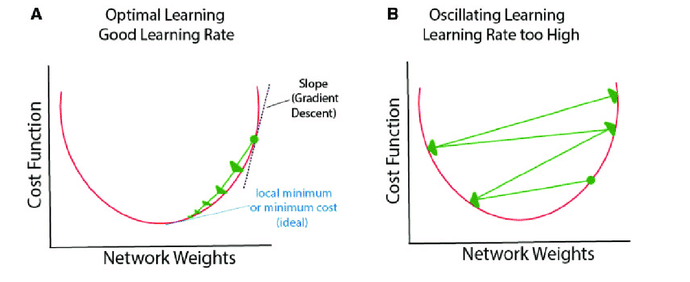

Let's see this in action. We'll start by doing a few steps of back-propagation in our single-neuron network. 

In [ ]:
def neuron(x, weights, bias):
  output = np.dot(x, weights) + bias
  return sigmoid(output)

# Use the neuron to predict for each sample
def feed_forward(X, weights, bias):
  y_pred = []
  for x in X:
    pred = neuron(x, weights, bias)
    y_pred.append(pred)
  return np.array(y_pred)

learning_rate = 0.05
X = data.to_numpy()[:,1:3]
y = data.to_numpy()[:,3]
weights = np.array([0.5, 0.5])
bias = 0
for i in range(3):
  # Get prediction
  y_pred = feed_forward(X, weights, bias)
  print(f"Iteration: {i}")
  print(f"Weights: {weights}")
  print(f"Bias: {bias}")
  print(f"Accuracy: {accuracy_score(y, y_pred > 0.5)*100}%")
  print(f"Loss: {loss_function(y_true, y_pred)}\n")

  # Backpropagate
  for x_idx, x in enumerate(X):
    weights += learning_rate*2*(y[x_idx] - y_pred[x_idx])*(sigmoid(y_pred[x_idx])*(1 - sigmoid(y_pred[x_idx])))*x
    bias += learning_rate*2*(y[x_idx] - y_pred[x_idx])*(sigmoid(y_pred[x_idx])*(1 - sigmoid(y_pred[x_idx])))


Iteration: 0
Weights: [0.5 0.5]
Bias: 0
Accuracy: 50.0%
Loss: 53.55592383286729

Iteration: 1
Weights: [ 0.71726799 -0.33448311]
Bias: -0.5495332130748789
Accuracy: 62.0%
Loss: 40.94266851513672

Iteration: 2
Weights: [ 1.35586266 -0.63583131]
Bias: -0.15216240113416268
Accuracy: 90.5%
Loss: 31.775700572881675



Note that at each iteration we update the network's weights, based on the loss that we obtained. Because of that, at each iteration, the loss becomes lower and the accuracy becomes higher. That means our network is learning!

Before we move ahead, try playing with other values for the learning rate. What happens when we set the learning rate to 0.01? What about 0.1?

## Training a Neural Network with Keras

We have gone through each of the components of a neural network, from the structure of a neuron, to the activation function, to how we measure performance and use that to train the network. However, we did that for a network with a single neuron. A proper network instead has a multitude of neurons. In fact, neural networks are often organized in layers, with each layer containing several neurons. For instance:


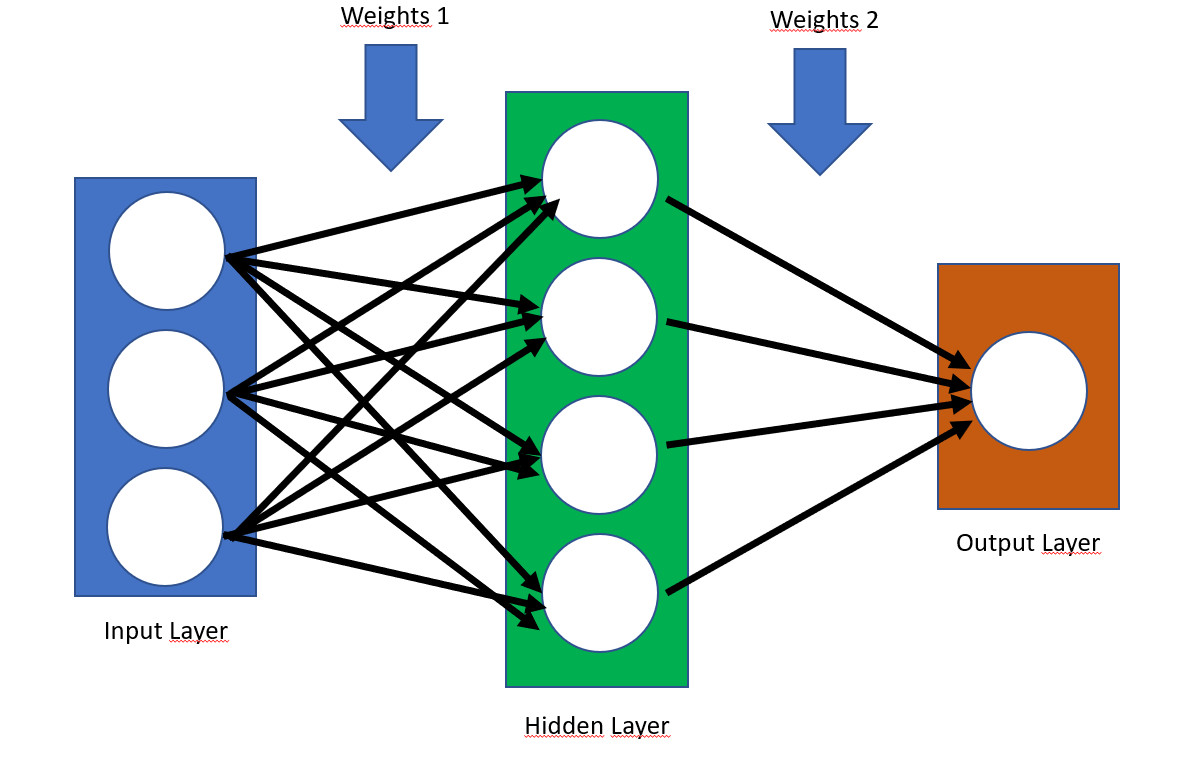

This is the illustration of a neural network with 2 layers (we do not count the input layer). The first layer, called hidden layer, has 4 neurons, while the second layer, the output layer, has a single neuron. In this network, each input will traverse the sequence of layers we defined until we achieve an output. The outputs of one layer behave as inputs to the next. This is known as a feedforward neural network. 

Everything in this neural network behaves the same, or similarly, to what we just saw. Each neuron follows the exact structure of the neuron in our single-neuron neural network. There is an activation function after each neuron to ensure non-linearity. Each neuron has a set of weights, which are updated using backpropagation, according to a loss function.

However, although the building blocks are the same, this 2-layer neural network is significantly more complex. (The previous network had 1 weight parameter and 1 bias parameter; this has 12 weight parameters and 5 bias parameters). But not only we have more neurons, we also organize them in separate layers, meaning we must learn weights for not only the inputs, but also between the neurons. Implementing this neural network manually like we did for our simple example is needlessly complex and time-consuming. In practice, we often use a library to simplify the process of creating and training a neural network. 

Let's see an example of this, using the [Keras](https://keras.io/) library to implement a Neural Network for our fruit classification problem. We will use Keras to implement a 2-layer Neural Network, with 4 neurons in the hidden layer and one neuron in the output layer.

First, let's create our network model:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

num_features = 2
num_classes = 1
model = Sequential(name="2layer_NN")
model.add(Dense(4, input_dim=num_features, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "2layer_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In general, neural networks for classification will always have the same number of neurons in last layer as the number of classes. We have one class, so only one neuron in the output layer.

Also, note that our network has 17 trainable parameters. These parameters correspond to the 12 weight terms and 5 bias terms of our neural network.

Next, we will compile and fit our model to the training data. For this, let's split our dataset into training and test sets, so that we can properly evaluate the model later. 

In [ ]:
from sklearn import model_selection
import keras
X_train, X_test, y_train, y_test = model_selection.train_test_split(data[['Mass', 'Surface']].values, data['Fruit'].values, test_size=0.2)

opt = keras.optimizers.SGD(learning_rate=0.1) # Use gradient descent with learning_rate=0.1
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)
model.fit(X_train, y_train, epochs=10, verbose=1, batch_size=1)

Epoch 1/10
160/160 [==============================] - 1s 999us/step - loss: 0.6558 - accuracy: 0.6114
Epoch 2/10
160/160 [==============================] - 0s 893us/step - loss: 0.5681 - accuracy: 0.7455
Epoch 3/10
160/160 [==============================] - 0s 862us/step - loss: 0.4349 - accuracy: 0.9329
Epoch 4/10
160/160 [==============================] - 0s 1ms/step - loss: 0.3215 - accuracy: 0.9528
Epoch 5/10
160/160 [==============================] - 0s 916us/step - loss: 0.2059 - accuracy: 0.9733
Epoch 6/10
160/160 [==============================] - 0s 902us/step - loss: 0.1862 - accuracy: 0.9664
Epoch 7/10
160/160 [==============================] - 0s 939us/step - loss: 0.1323 - accuracy: 0.9849
Epoch 8/10
160/160 [==============================] - 0s 877us/step - loss: 0.1036 - accuracy: 0.9983
Epoch 9/10
160/160 [==============================] - 0s 1ms/step - loss: 0.1307 - accuracy: 0.9834
Epoch 10/10
160/160 [==============================] - 0s 906us/step - loss: 0.0984 - 

Note that when we train our model (using the fit command), we had to give a value to the "epochs" parameter. Epochs in neural networks means how many times we repeat the training loop on the full dataset. That is:
1. Make predictions for each sample in the dataset
2. Compute the loss
3. Backpropagate the error
4. Update the model parameters

In this example, we are repeating this loop 10 times. You can see that as the epochs pass, the model's accuracy goes up and the loss goes down. Also, note in this case we are using the [cross-entropy](https://machinelearningmastery.com/cross-entropy-for-machine-learning/) loss function. Cross-entropy is a classic loss function for classification NNs.


We can finally evaluate our model in the test set using:

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11164601892232895
Test accuracy: 1.0


## Lab06: Classifying Security Vulnerabilities with Neural Networks

Let's revisit our task of classifying the severity of security vulnerabilities, this time, using a neural network classifier. For this assignment, we will work on a slightly easier version of this problem where we classify whether a vulnerability has high severity or not.

In [ ]:
# Download the dataset
!wget "https://homepages.dcc.ufmg.br/~arturluis/202ds/2020cvss.csv" --no-check-certificate -nc

# Read it and print the first five rows
cvss_data = pd.read_csv('2020cvss.csv')
cvss_data["label"] = (cvss_data["label"] >= 2).astype(int)
cvss_data.head()

Recall that we have 7 features:
- Attack Vector
- Attack Complexity
- Privileges Required
- User Interaction
- Confidentiality Impact
- Integrity Impact
- Availability Impact

The features are already converted to numerical representations and normalized.

Now it's your turn. Use this dataset to train a Neural Network classifier using Keras. The steps for this are outlined in the cells below, fill in the missing code.

Important! Before you get started, create your own copy of this notebook to your google drive and work on your copy.

Once you are done, submit your solutions here: https://forms.gle/Y5srpGmyUx1jjBAr9


First, define your neural network. Create a network with 2 layers. Use 16 neurons in the hidden layer. See how many trainable parameters there are in your network.

In [ ]:
# Add your code here

Split the dataset into training and test sets and train your network in the training set. Train your network for 10 epochs and set the learning rate to 0.1.




In [ ]:
# Add your code here

Test your network using the test set. 

In [ ]:
# Add your code here

Try retraining your network with learning rates 0.001 and 10. What happens to the loss and accuracy?

In [ ]:
# Add your code here